In [158]:
import warnings
warnings.filterwarnings("ignore")

In [159]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.neighbors import KNeighborsRegressor

In [160]:
df = pd.read_csv('datos_exportados_clean.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [161]:
# Filtrado de datos
lat = 22.625
lon = -107.125
df_filtered = df[(df['Latitud'] == lat) & (df['Longitud'] == lon)]

# Creación de columnas retrasadas
for i in range(1, 12):
    df_filtered[f'SST_Lag{i}'] = df_filtered['SST'].shift(i)

df_filtered.dropna(inplace=True)


In [162]:
# Configuración de la ventana deslizante
window_size = 12
prediction_step = 1
train_start = 0
train_end = train_start + window_size

predictions = []
actual = []
dff= []
dfff = []

In [163]:
while train_end + prediction_step - 1 < len(df_filtered):
    # Datos de entrenamiento y prueba
    train_data = df_filtered.iloc[train_start:train_end]
    test_data = df_filtered.iloc[train_end:train_end + prediction_step]

    if test_data['Fecha'].dt.year.values[0] < 2009:
        train_start += 1
        train_end += 1
        continue
    if test_data['Fecha'].dt.year.values[0] > 2014:
        break

    # Características y variable objetivo
    features = [f'SST_Lag{i}' for i in range(1, 12)]
    X_train = train_data[features]
    y_train = train_data['SST']
    X_test = test_data[features]

    # Entrenamiento del modelo KNN
    model = KNeighborsRegressor(n_neighbors=10)
    model.fit(X_train, y_train)

    # Predicción para los próximos 6 días
    pred = model.predict(X_test)
    predictions.append(pred[-1])  # Agregar la predicción del sexto día a la lista
    actual.append(test_data['SST'].values[-1])  # Agregar el valor real del sexto día a la lista
    dfff.append(test_data['SST'])
    # Mover la ventana
    train_start += 1
    train_end += 1

In [164]:

print(len(actual))
actual

72


[23.66355,
 23.11036,
 23.87871,
 23.54933,
 25.4729,
 27.72667,
 28.68226,
 29.95226,
 30.121,
 29.88226,
 27.80467,
 25.91355,
 24.05064,
 24.19286,
 23.33806,
 24.529,
 25.06742,
 26.845,
 28.36516,
 29.19484,
 28.41767,
 28.39226,
 26.55233,
 24.04806,
 21.70645,
 21.02536,
 21.77742,
 23.33267,
 26.24355,
 27.097,
 29.05742,
 30.04484,
 29.85667,
 30.22548,
 27.47333,
 24.51645,
 22.44806,
 21.79517,
 21.39258,
 22.69567,
 25.88322,
 25.94267,
 29.04032,
 29.3671,
 29.663,
 30.19419,
 27.767,
 25.91097,
 23.06677,
 21.71607,
 21.32032,
 23.55467,
 24.61193,
 27.29867,
 29.10419,
 29.46387,
 28.82167,
 29.24871,
 28.58733,
 25.61129,
 24.26839,
 24.495,
 23.57871,
 24.28133,
 27.01323,
 28.555,
 29.84774,
 30.06774,
 29.71433,
 29.02613,
 27.853,
 25.47032]

In [165]:
dfff

[853787    23.66355
 Name: SST, dtype: float64,
 856384    23.11036
 Name: SST, dtype: float64,
 858981    23.87871
 Name: SST, dtype: float64,
 861578    23.54933
 Name: SST, dtype: float64,
 864175    25.4729
 Name: SST, dtype: float64,
 866772    27.72667
 Name: SST, dtype: float64,
 869369    28.68226
 Name: SST, dtype: float64,
 871966    29.95226
 Name: SST, dtype: float64,
 874563    30.121
 Name: SST, dtype: float64,
 877160    29.88226
 Name: SST, dtype: float64,
 879757    27.80467
 Name: SST, dtype: float64,
 882354    25.91355
 Name: SST, dtype: float64,
 884951    24.05064
 Name: SST, dtype: float64,
 887548    24.19286
 Name: SST, dtype: float64,
 890145    23.33806
 Name: SST, dtype: float64,
 892742    24.529
 Name: SST, dtype: float64,
 895339    25.06742
 Name: SST, dtype: float64,
 897936    26.845
 Name: SST, dtype: float64,
 900533    28.36516
 Name: SST, dtype: float64,
 903130    29.19484
 Name: SST, dtype: float64,
 905727    28.41767
 Name: SST, dtype: float64,

In [166]:

resultados = pd.DataFrame({
    'Prediccion_SST': predictions
})

In [167]:
resultados.to_csv("output_KnnDoceMeses.csv", index=False)

df_adjust = df_filtered[(df_filtered["Fecha"] >= '2009-01-01') & (df_filtered['Fecha'] < '2015-01-01')]

df_adjust = df_adjust.reset_index(drop=True)

df_adjust = pd.DataFrame(df_adjust)

In [168]:
df_adjust.to_csv('FechasCompararDoceMesesKNN.csv', index=False)

In [169]:
df_adjust.to_csv('FechasCompararDoceMesesKNN.csv', index=False)

In [170]:
resultados = pd.read_csv("output_KnnDoceMeses.csv")
# Asumiendo que data['SST'] son tus observaciones reales y y_ts_pred son tus predicciones.
df_adjust = pd.read_csv('FechasCompararDoceMesesKNN.csv')

In [171]:
resultados.insert(0, 'Fecha', df_adjust['Fecha'])

print((resultados))
"""# Convertir año y mes a una fecha (primer día de cada mes)
sst_promedio_mensual['Fecha'] = pd.to_datetime(sst_promedio_mensual['Año'].astype(str) + '-' +
                                               sst_promedio_mensual['Mes'].astype(str) + '-01')
"""
df_adjust['Fecha'] = pd.to_datetime(df_adjust['Fecha'])
resultados['Fecha'] = pd.to_datetime(resultados['Fecha'])

         Fecha  Prediccion_SST
0   2009-01-01       25.657026
1   2009-02-01       25.473643
2   2009-03-01       25.550144
3   2009-04-01       25.815693
4   2009-05-01       25.922960
..         ...             ...
67  2014-08-01       27.500888
68  2014-09-01       27.630243
69  2014-10-01       27.397424
70  2014-11-01       26.947799
71  2014-12-01       26.590915

[72 rows x 2 columns]


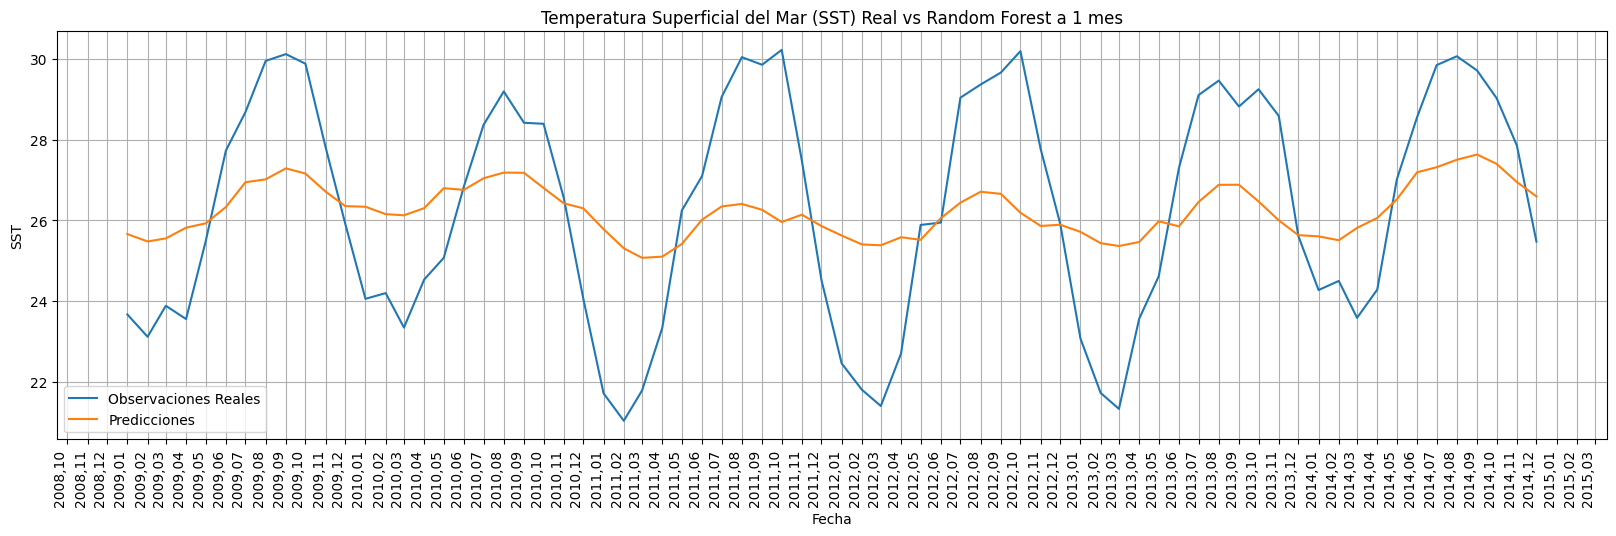

In [172]:
# Gráfico
plt.figure(figsize=(20, 6))
#plt.plot(df_adjust['Fecha'], df_adjust['SST'],linestyle='-', label='Observaciones Reales')
plt.plot(df_adjust['Fecha'], actual,linestyle='-', label='Observaciones Reales')
plt.plot(df_adjust['Fecha'], resultados['Prediccion_SST'],  linestyle='-', label='Predicciones')
plt.title('Temperatura Superficial del Mar (SST) Real vs Random Forest a 1 mes')
plt.xlabel('Fecha')
plt.ylabel('SST')
plt.legend()

# Formatear el eje x para mostrar cada año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y,%m'))
plt.gcf().autofmt_xdate()  # Auto-rotar las fechas para que sean legibles
plt.grid(True)
plt.xticks(rotation=90)
plt.show()